In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [21]:
# Load the CSV file
# file_path = "/mnt/data/HistoricalQuotes.csv"
df = pd.read_csv("HistoricalQuotes.csv")
df.head(2)

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96


In [22]:
# Clean column names
df.columns = df.columns.str.strip()

In [23]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
# Remove '$' and convert price columns to float
price_cols = ['Close/Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)

In [25]:
# Sort data by date
df = df.sort_values(by='Date')

In [26]:
# 1. Finding Best Stocks to Short-Sell (Largest Price Drops)
df['Daily_Change'] = df['Close/Last'].pct_change()
worst_stock = df.nsmallest(10, 'Daily_Change')
print("Worst 10 Days for Short Selling:")
print(worst_stock[['Date', 'Close/Last', 'Daily_Change']])


Worst 10 Days for Short Selling:
           Date  Close/Last  Daily_Change
1786 2013-01-24     64.3571     -0.123550
290  2019-01-03    142.1900     -0.099607
1532 2014-01-28     72.3571     -0.079927
330  2018-11-02    207.4800     -0.066331
1029 2016-01-27     93.4200     -0.065707
1    2020-02-27    273.5200     -0.065368
1819 2012-12-05     76.9703     -0.064346
966  2016-04-27     97.8200     -0.062578
1137 2015-08-21    105.7600     -0.061163
201  2019-05-13    185.7200     -0.058119


In [27]:
# 2. After-Hours Trading Impact
df['After_Hours_Change'] = abs(df['Open'] - df['Close/Last'].shift(1))
biggest_changes = df.nlargest(10, 'After_Hours_Change')
print("Top 10 After-Hours Changes:")
print(biggest_changes[['Date', 'Open', 'Close/Last', 'After_Hours_Change']])


Top 10 After-Hours Changes:
           Date    Open  Close/Last  After_Hours_Change
0    2020-02-28  257.26      273.36               16.26
4    2020-02-24  297.26      298.18               15.79
290  2019-01-03  143.98      142.19               13.94
330  2018-11-02  209.55      207.48               12.67
1    2020-02-27  281.10      273.52               11.55
1136 2015-08-24   94.87      103.12               10.89
8    2020-02-18  315.36      319.00                9.59
201  2019-05-13  187.71      185.72                9.47
647  2017-08-02  159.28      157.14                9.23
209  2019-05-01  209.88      210.52                9.21


In [28]:
# 3. Using Bollinger Bands for Market Forecasting
window = 20
std_dev = 2
df['Rolling_Mean'] = df['Close/Last'].rolling(window=window).mean()
df['Rolling_STD'] = df['Close/Last'].rolling(window=window).std()
df['Upper_Band'] = df['Rolling_Mean'] + (std_dev * df['Rolling_STD'])
df['Lower_Band'] = df['Rolling_Mean'] - (std_dev * df['Rolling_STD'])

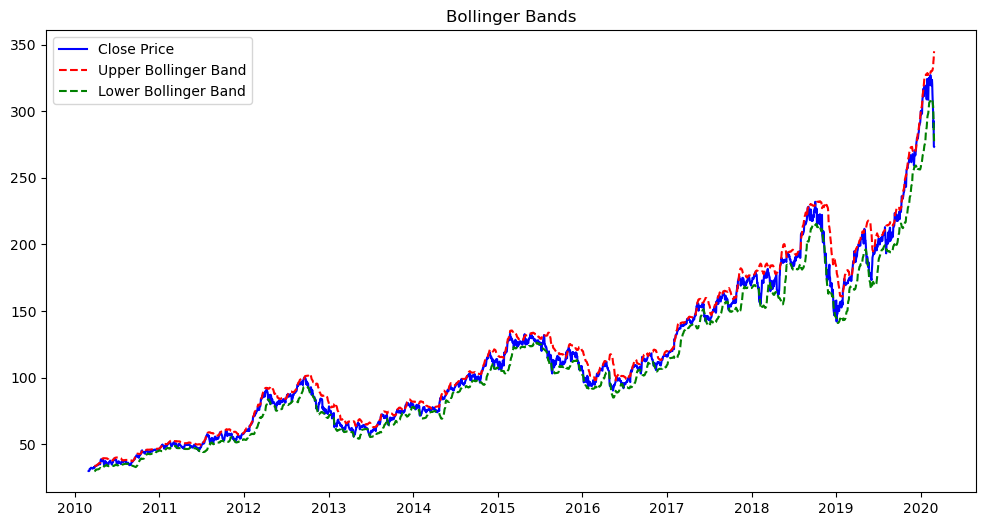

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Bollinger Band', linestyle='dashed', color='red')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Bollinger Band', linestyle='dashed', color='green')
plt.title("Bollinger Bands")
plt.legend()
plt.show()

In [30]:
# 4. Identifying Periods of Steady Increase and Decline
df['Trend'] = df['Close/Last'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
trend_counts = df['Trend'].value_counts()
print("Trend Counts:")
print(trend_counts)


Trend Counts:
Trend
Increase    1329
Decrease    1189
Name: count, dtype: int64


In [31]:
# 5. Optimal Buy Day for Holding Until Now
optimal_buy = df.nsmallest(1, 'Close/Last')
print("Optimal Buy Day:")
print(optimal_buy[['Date', 'Close/Last']])

Optimal Buy Day:
           Date  Close/Last
2516 2010-03-02     29.8357


In [32]:
# 6. Stock Movement on High Trading Volume Days
high_volume_threshold = df['Volume'].quantile(0.90)
high_volume_days = df[df['Volume'] > high_volume_threshold]
high_volume_movement = high_volume_days['Close/Last'].diff().apply(lambda x: 'Up' if x > 0 else 'Down').value_counts()
print("Stock Movement on High Volume Days:")
print(high_volume_movement)

Stock Movement on High Volume Days:
Close/Last
Down    126
Up      126
Name: count, dtype: int64
